# Logististic regression

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Sep 17, 2025 15:26

# Preamble

## Message of the Day

![](https://cdn.theatlantic.com/thumbor/e3cWq_N5d7ra9OaF0EH0Qi4yH4E=/0x0:2000x1125/1952x1098/media/img/mt/2025/09/AIA_S2_Ep_9/original.jpg)

[AI and the Rise of Techno-Fascism in the United
States](https://www.theatlantic.com/podcasts/archive/2025/09/ai-and-the-fight-between-democracy-and-autocracy/684095/)
by Gary Kasparov, The Atlantic, 2025-09-05. (31m 13s)

A 30 minutes podcast where Garry Kasparov is joined by cognitive
scientist Gary Marcus.

[Garry Kasparov](https://www.kasparov.com) (b. 1963) is a Russian chess
grandmaster and former World Chess Champion, widely regarded as one of
the greatest players in history. He held the world’s top ranking for
nearly two decades and is also known for his matches against IBM’s Deep
Blue and his later political activism and writing.

[Gary Marcus](http://garymarcus.com/) (b. 1965) is an American cognitive
scientist, author, and entrepreneur. He is known for his critiques of
deep learning, his work on language acquisition and cognitive
development, and for founding several AI startups.

> Kasparov and Marcus agree that AI is a tool—neither inherently utopian
> nor dystopian—and that the real risks stem from how it is used and by
> whom. Marcus emphasizes current AI systems still lack genuine
> understanding; they work by pattern recognition over vast datasets,
> not by grasping rules or concepts, which leads to alignment problems:
> machines frequently err or act in unforeseen ways. A major concern is
> how AI amplifies political deception, surveillance, and information
> manipulation—tools favored by autocratic or oligarchic interests. On
> the brighter side, they argue that we are not powerless: democratic
> societies still have levers—legal regulation, mass action, resistance,
> insistence on accountability—and might yet steer AI toward benefiting
> rather than undermining democracy. The default path is dangerous, but
> with political will, things need not slide irreversibly toward
> techno-fascism. (Summary generated by ChatGPT 5 on 2025-09-16)

## Learning Objectives

-   **Differentiate** between binary classification and multi-class
    classification paradigms.
-   **Describe** a methodology for converting multi-class classification
    problems into binary classification tasks.
-   **Implement** a logistic regression algorithm, focusing on its
    application in classification problems.

# Classification tasks

## Definitions

-   **Binary classification** is a supervised learning task where the
    objective is to categorize instances (examples) into one of **two
    discrete classes**.

-   A **multi-class classification** task is a type of supervised
    learning problem where the objective is to categorize instances into
    one of **three or more discrete classes**.

**Caveat**: **Multi-class classification** should not be confused with
**multi-label classification**, which allows an instance to be
associated with multiple classes. The algorithms designed to address
these tasks differ significantly.

-   An example of a binary classification task is the prediction of
    disease status using genomic data (Wu et al. 2018).
-   Researchers often seek to accurately classify the type, subtype, or
    stage of cancer using gene expression data. For example, in the
    Pan-Cancer Atlas, specific cancers such as Breast Cancer (BRCA),
    Colon Adenocarcinoma (COAD), Lung Adenocarcinoma (LUAD), Ovarian
    Cancer (OV), and Thyroid Cancer (THCA) can be differentiated based
    on their unique gene expression profiles (Alharbi and Vakanski
    2023).

## Binary classification

-   Some machine learning algorithms are specifically designed to solve
    binary classification problems.
    -   **Logistic regression** and **support vector machines** (SVMs)
        are such examples.

Later in the presentation, make sure to understand why the logistic
regression is specifically designed to solve binary classification
problems.

## Multi-class classification

-   Any **multi-class classification problem** can be transformed into a
    **binary classification problem**.
-   **One-vs-All (OvA)**
    -   A **separate binary classifier** is trained **for each class**.
    -   For each classifier, **one class** is treated as the **positive
        class**, and **all other classes** are treated as the **negative
        class**.
    -   The **final assignment** of a class label is made based on the
        classifier that outputs the **highest confidence score** for a
        given input.

Scikit-learn offers
[`OneVsRestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier),
a utility designed to extend binary classifiers for multi-class
classification tasks via the One-vs-Rest strategy.

A complete example will be presented at the end of the lecture.

# Logistic Regression

## Data and Problem

-   **Dataset**: Palmer Penguins
-   **Task**: Binary classification to distinguish Gentoo penguins from
    non-Gentoo species
-   **Feature of Interest**: Flipper length

## Histogram

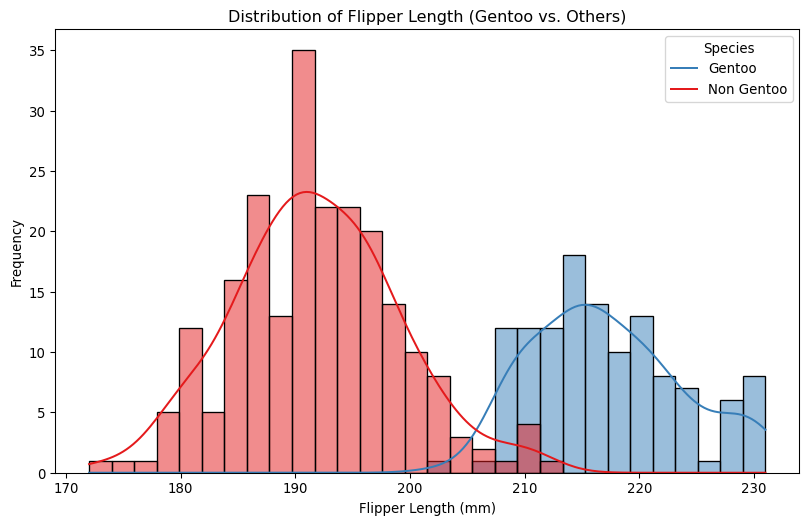

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    from palmerpenguins import load_penguins
except ImportError:
    ! pip install palmerpenguins
    from palmerpenguins import load_penguins

# Load the Palmer Penguins dataset
df = load_penguins()

# Keep only 'flipper_length_mm' and 'species'
df = df[['flipper_length_mm', 'species']]

# Drop rows with missing values (NaNs)
df.dropna(inplace=True)

# Create a binary label: 1 if Gentoo, 0 otherwise
df['is_gentoo'] = (df['species'] == 'Gentoo').astype(int)

# Separate features (X) and labels (y)
X = df[['flipper_length_mm']]
y = df['is_gentoo']

# Plot the distribution of flipper lengths by binary species label
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='flipper_length_mm', hue='is_gentoo', kde=True, bins=30, palette='Set1')
plt.title('Distribution of Flipper Length (Gentoo vs. Others)')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.legend(title='Species', labels=['Gentoo', 'Non Gentoo'])
plt.show()

## Logistic (Logit) Regression

-   Despite its name, **logistic regression** serves as a
    **classification** algorithm rather than a regression technique.

-   The **labels** in logistic regression are binary values, denoted as
    $y_i \in \{0,1\}$, making it a **binary classification task**.

-   The primary objective of logistic regression is to determine the
    **probability** that a given instance $x_i$ belongs to the
    **positive class**, i.e., $y_i = 1$.

The representation of the two classes, **negative** and **positive**, by
the values 0 and 1, respectively, is not arbitrary. This choice is
intrinsically connected to our objective of determining the
**probability** that an instance $x_i$ belongs to the positive class.

While this learning algorithm may initially seem unremarkable, it is
essential to continue engaging with it, as logistic regression will
later prove to be crucial in the discussion on artificial neural
networks.

## Model

-   **General Case:** $P(y = k | x, \theta)$, where $k$ is a class
    label.
-   **Binary Case**: $y \in {0,1}$
    -   **Predict** $P(y = 1 | x, \theta)$

## Visualizing our data

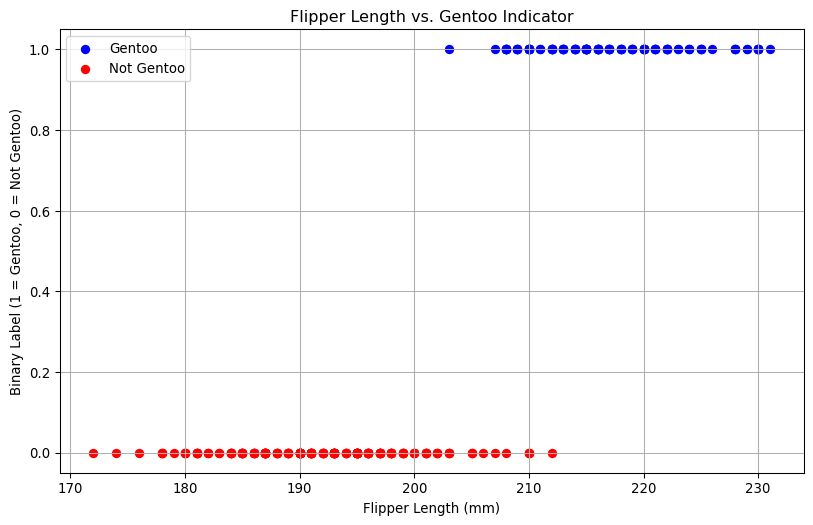

In [2]:
# Scatter plot of flipper length vs. binary label (Gentoo or Not Gentoo)
plt.figure(figsize=(10, 6))

# Plot points labeled as Gentoo (is_gentoo = 1)
plt.scatter(
    df.loc[df['is_gentoo'] == 1, 'flipper_length_mm'],
    df.loc[df['is_gentoo'] == 1, 'is_gentoo'],
    color='blue',
    label='Gentoo'
)

# Plot points labeled as Not Gentoo (is_gentoo = 0)
plt.scatter(
    df.loc[df['is_gentoo'] == 0, 'flipper_length_mm'],
    df.loc[df['is_gentoo'] == 0, 'is_gentoo'],
    color='red',
    label='Not Gentoo'
)

plt.title('Flipper Length vs. Gentoo Indicator')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Binary Label (1 = Gentoo, 0 = Not Gentoo)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Intuition

Fitting a linear regression is not the answer, but $\ldots$

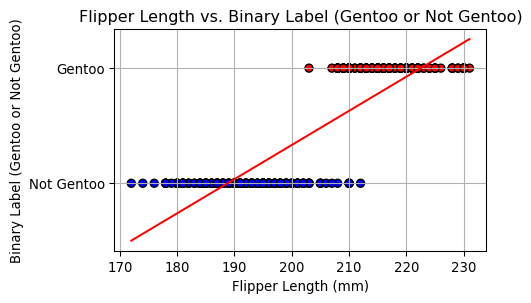

In [3]:
from sklearn.linear_model import LinearRegression
import pandas as pd

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = pd.DataFrame([X.min(), X.max()], columns=X.columns)

y_pred = lin_reg.predict(X_new)

# Plot the scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k')
plt.plot(X_new, y_pred, "r-")
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Binary Label (Gentoo or Not Gentoo)')
plt.title('Flipper Length vs. Binary Label (Gentoo or Not Gentoo)')
plt.yticks([0, 1], ['Not Gentoo', 'Gentoo'])
plt.grid(True)
plt.show()

## Intuition (continued)

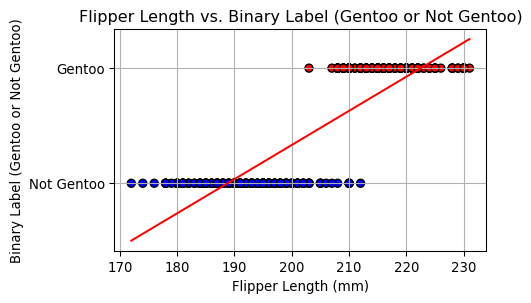

-   A high **`flipper_length_mm`** typically results in a model output
    approaching 1.

-   Conversely, a low **`flipper_length_mm`** generally yields a model
    output near 0.

-   Notably, the model outputs are not confined to the \[0, 1\] interval
    and may occasionally fall below 0 or surpass 1.

## Intuition (continued)

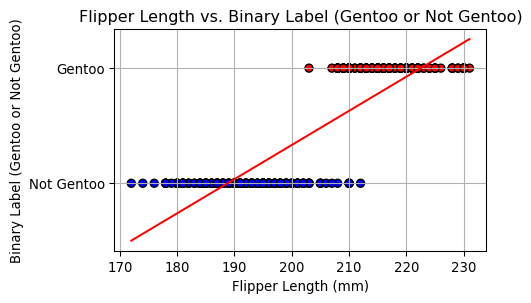

-   For a **single feature**, the decision boundary is a **specific
    point**.
-   In this case, the **decision boundary** is approximately 205.

## Intuition (continued)

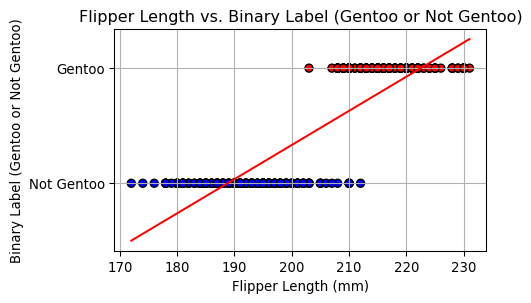

-   As **`flipper_length_mm`** increases from 205 to 230, confidence in
    classifying the example as Gentoo rises.
-   Conversely, as **`flipper_length_mm`** decreases from 205 to 170,
    confidence in classifying the example as non-Gentoo rises.

## Intuition (continued)

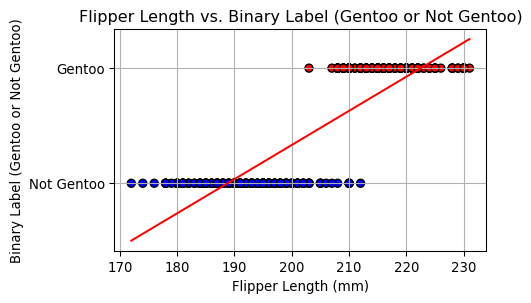

-   For **values near the decision boundary**, 205, some examples
    classify as Gentoo while others do not, leading to a classification
    uncertainty comparable to a coin flip (**0.5 probability**).

# Logistic Function

## Logistic Function

In mathematics, the **standard logistic function** maps a real-valued
input from $\mathbb{R}$ to the open interval $(0,1)$. The function is
defined as:

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

``` python
# Sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# Generate t values
t = np.linspace(-6, 6, 1000)

# Compute y values for the sigmoid function
sigma = sigmoid(t)

# Create a figure
fig, ax = plt.subplots()
ax.plot(t, sigma, color='blue', linewidth=2)  # Keep the curve opaque

# Draw vertical axis at x = 0
ax.axvline(x=0, color='black', linewidth=1)

# Add labels on the vertical axis
ax.set_yticks([0, 0.5, 1.0])

# Add labels to the axes
ax.set_xlabel('t')
ax.set_ylabel(r'$\sigma(t)$')

plt.grid(True)
plt.show()
```

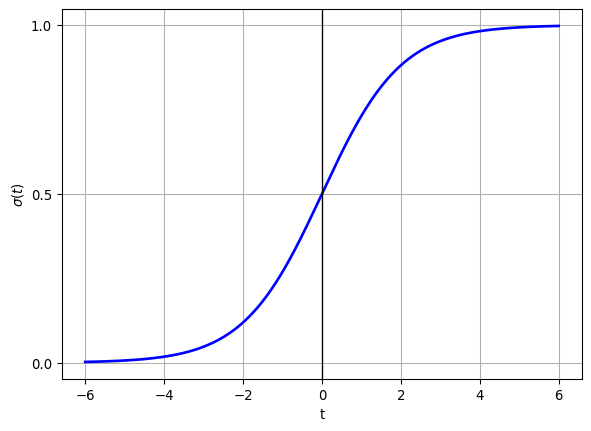

-   When the input variable $t$ is 0, the output of the logistic
    function is 0.5.
    -   Indeed, $e^{-t} = {e^0} = 1$ and thus
        $\frac{1}{1+e^{-t}} = \frac{1}{1+1}= \frac{1}{2}.$
-   As $t$ increases, the output value approaches 1.
    -   As $t \to \infty$, $e^{-t} \to 0$.
-   Conversely, as $t$ becomes more negative, the output value
    approaches 0.
    -   As $t \to -\infty$, $e^{-t} \to \infty$ (the two negative signs
        cancel out).
-   The standard logistic function is also commonly referred to as the
    **sigmoid** function.

## Logistic Regression (intuition)

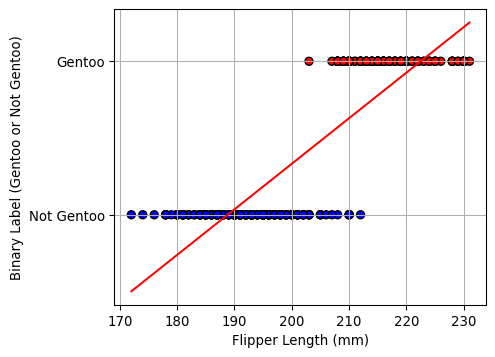

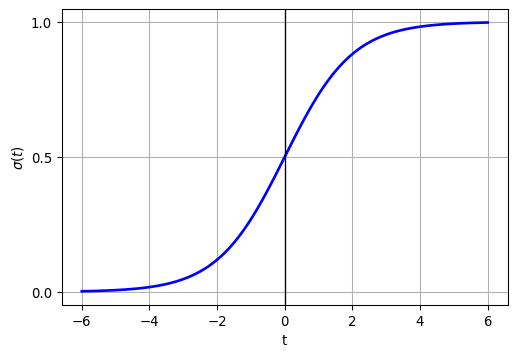

-   When the **distance to the decision boundary** is **zero**,
    uncertainty is high, making a probability of **0.5** appropriate.
-   As we move **away from the decision boundary**, confidence
    increases, warranting **higher** or **lower** probabilities
    accordingly.

## Logistic function

An S-shaped curve, such as the standard logistic function (aka
**sigmoid**), is termed a **squashing function** because it maps a wide
input domain to a constrained output range.

$$
  \sigma(t) = \frac{1}{1+e^{-t}}
$$

``` python
# Create a figure
fig, ax = plt.subplots()
ax.plot(t, sigma, color='blue', linewidth=2)  # Keep the curve opaque

# Draw vertical axis at x = 0
ax.axvline(x=0, color='black', linewidth=1)

# Add labels on the vertical axis
ax.set_yticks([0, 0.5, 1.0])

# Add labels to the axes
ax.set_xlabel('t')
ax.set_ylabel(r'$\sigma(t)$')

plt.grid(True)
plt.show()
```

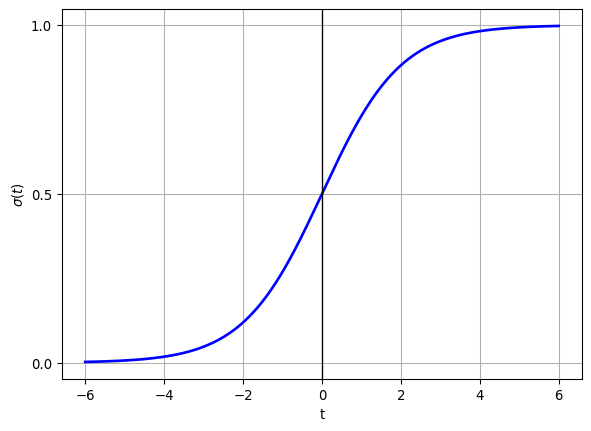

## Logistic (Logit) Regression

-   Analogous to **linear regression**, **logistic regression** computes
    a weighted sum of the input features, expressed as: $$
    \theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)}
    $$

-   However, using the sigmoid function limits its output to the range
    $(0,1)$: $$
    \sigma(\theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

## Notation

-   Equation for the **logistic regression**: $$
    \sigma(\theta_0 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

-   Multipling $\theta_0$ (intercept/bias) by 1: $$
    \sigma(\theta_0 \times 1 + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

-   Multipling $\theta_0$ by $x_i^{(0)} = 1$: $$
    \sigma(\theta_0 x_i^{(0)} + \theta_1 x_i^{(1)} + \theta_2 x_i^{(2)} + \ldots + \theta_D x_i^{(D)})
    $$

## Logistic regression

The **Logistic Regression** model, in its vectorized form, is defined
as:

$$
  h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
  $$

An extra feature, $x_i^{(0)} = 1$, has been added to $x_i$, and
$\theta_0$ is the intercept/bias term.

## Logistic regression (two attributes)

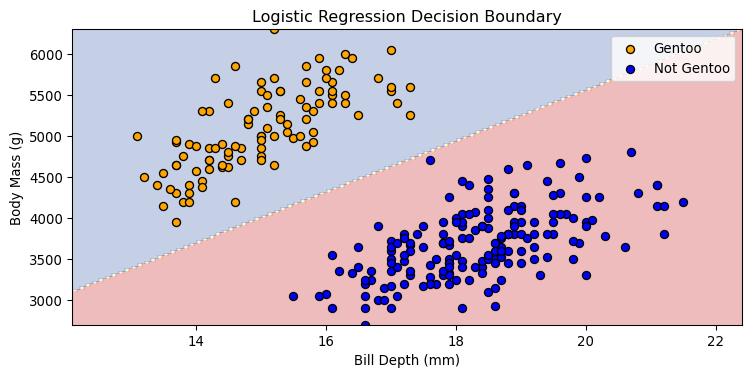

$$
  h_\theta(x_i) = \sigma(\theta x_i)
$$

-   In logistic regression, **the probability of correctly classifying
    an example increases as its distance from the decision boundary
    increases**.
-   This principle holds for both **positive** and **negative** classes.
-   An example lying on the decision boundary has a **50% probability**
    of belonging to either class.

## Logistic regression

-   The **Logistic Regression** model, in its vectorized form, is
    defined as:

    $$
    h_\theta(x_i) = \sigma(\theta x_i) = \frac{1}{1+e^{- \theta x_i}}
    $$

-   **Predictions** are made as follows:

    -   $y_i = 0$, if $h_\theta(x_i) < 0.5$
    -   $y_i = 1$, if $h_\theta(x_i) \geq 0.5$

. . .

-   The values of $\theta$ are learned using **gradient descent**.

------------------------------------------------------------------------

<https://youtu.be/yIYKR4sgzI8>

**Attribution**: [StatQuest: Logistic
Regression](https://youtu.be/yIYKR4sgzI8) by Josh Starmer.

“StatQuest breaks down complicated Statistics and Machine Learning
methods into small, bite-sized pieces that are easy to understand.
StatQuest doesn’t dumb down the material, instead, it builds you up so
that you are smarter and have a better understanding of Statistics and
Machine Learning.” It is often a good place to start to get the
intuition to understand statistical and machine learning concepts.

# Digits example

## 1989 Yann LeCun

<https://www.youtube.com/watch?v=H0oEr40YhrQ>

## Handwritten Digit Recognition

### Aims:

-   Developing a **logistic regression model** for the **recognition of
    handwritten digits**.

-   Visualize the **insights** and **patterns** the model has acquired.

We are using the [UCI ML hand-written digits
datasets](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits).

## UCI ML hand-written digits datasets

Loading the dataset

In [14]:
from sklearn.datasets import load_digits

digits = load_digits()

What is the type of `digits.data`

In [15]:
type(digits.data)

numpy.ndarray

Developing a **logistic regression model** for the **recognition of
handwritten digits**.

## UCI ML hand-written digits datasets

How many examples (`N`) and how many attributes (`D`)?

In [16]:
digits.data.shape

(1797, 64)

Assigning `N` and `D`

In [17]:
N, D = digits.data.shape

`target` has the same number of entries (examples) as `data`?

In [18]:
digits.target.shape

(1797,)

## UCI ML hand-written digits datasets

What are the width and height of those images?

In [19]:
digits.images.shape

(1797, 8, 8)

Assigning `width` and `height`

In [20]:
_, width, height = digits.images.shape

## UCI ML hand-written digits datasets

Assigning `X` and `y`

In [21]:
X = digits.data
y = digits.target

## UCI ML hand-written digits datasets

`X[0]` is a vector of size `width * height = D` ($8 \times 8 = 64$).

In [22]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

. . .

It corresponds to an $8 \times 8 = 64$ image.

In [23]:
X[0].reshape(width, height)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## UCI ML hand-written digits datasets

Plot the first `n=5` examples

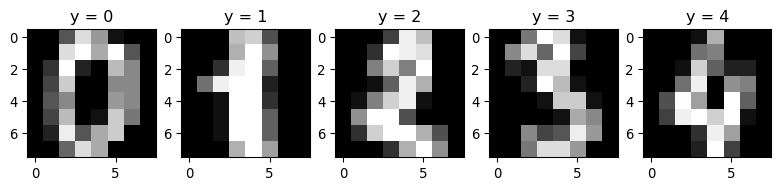

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,2))
n = 5

for index, (image, label) in enumerate(zip(X[0:n], y[0:n])):
    plt.subplot(1, n, index + 1)
    plt.imshow(np.reshape(image, (width,width)), cmap=plt.cm.gray)
    plt.title(f'y = {label}')

Intensity values close to 0 are represented in black, while high values
are represented in white.

Use `cmap=plt.cm.binary` to invert the images (intensity values close to
0 in white, high values in black).

## UCI ML hand-written digits datasets

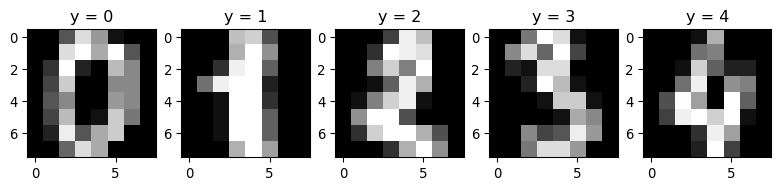

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,2))
n = 5

for index, (image, label) in enumerate(zip(X[0:n], y[0:n])):
    plt.subplot(1, n, index + 1)
    plt.imshow(np.reshape(image, (width,width)), cmap=plt.cm.gray)
    plt.title(f'y = {label}')

-   In our dataset, each $x_i$ is an **attribute vector** of size
    $D = 64$.

-   This vector is formed by concatenating the rows of an $8 \times 8$
    image.

-   The `reshape` function is employed to convert this 64-dimensional
    vector back into its original $8 \times 8$ image format.

## UCI ML hand-written digits datasets

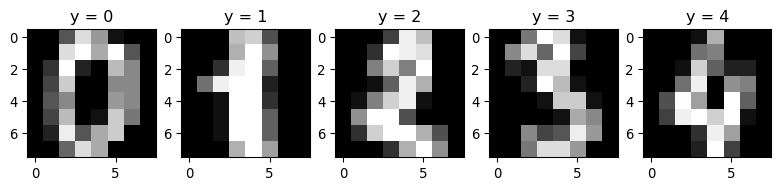

-   We will train **10 classifiers**, each corresponding to a specific
    digit in a **One-vs-All (OvA)** approach.

-   Each classifier will determine the optimal values of $\theta_j$
    (associated with the pixel features), allowing it to distinguish one
    digit from all other digits.

## UCI ML hand-written digits datasets

Preparing for our machine learning experiment

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## UCI ML hand-written digits datasets

Optimization algorithms generally work best when the attributes have
similar ranges.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Discussion**: importance of applying `fit_transform` only to
`X_train`.

Certain classifiers exhibit suboptimal performance when there are
significant variations in feature scales. This issue is particularly
pronounced in classifiers that utilize gradient descent for parameter
optimization, as they can be adversely affected by discrepancies in
feature scale. Consequently, standardization of features is a widely
adopted practice to mitigate this problem.

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
is a commonly used approach. For a given feature, the values are
transformed as follows:

$$
z = (x - \mu) / \sigma
$$

where $\mu$ is the average of all the values for that feature for the
training data, and $\sigma$ the corresponding standard deviation.

Calling `fit` forces the scaler to learn the mean and standard deviation
of each feature. Calling `tranform`, applies the transformation onto the
designated dataset. Finally, calling `fit_transform` combines the two
steps.

It would be an error to apply `fit` or `fit_transform` on the entire
dataset, an error called **data leakeage**. Information from the test
data would influence the mean and standard deviation learnt by the
scaler. The training data would be transformed using information from
the test set. The model will learn from training data scaled using
information baised by the test set. The test set is no longer
independent.

It is paramount to scale the test data. The model has been trained on
scaled data, here with mean values centered at zero and standard
deviation of 1. The original data was likely on a widely different
scale. Imagine a attribute representing the temperature in celcius might
have values -40 to 40. Another attribute, this one representing a grade,
with values from 0 to 100. The model would produce non sense results on
such data. The test data needs to be scaled using the mean and standard
deviation from the training data, which represents the frame of
reference for its training.

1.  **Fairness in evaluation (no cheating):** If you use the test data
    to compute the mean and variance, you’re peeking at the answers.
    Even though it’s “just” a mean and standard deviation, that’s still
    information from the test set. This breaks the principle that test
    data should remain completely unseen until evaluation.

2.  **Consistency of distribution:** The model was trained assuming
    features are centered and scaled using the training distribution. If
    you scale test data differently (e.g., with its own mean/std), then
    the numbers the model sees no longer match the distribution it was
    trained on. It’s like giving the model inputs in a “new language.”

3.  **Deployment perspective:** In real applications, you’ll only ever
    have the training distribution to compute the scaling parameters.
    When the model is deployed, you can’t stop time to recompute scaling
    each time new data arrives — you must apply the fixed transformation
    learned from the training data.

**“The scaler is part of the model.”** Just like weights in logistic
regression, the `StandardScaler`’s mean and variance are **learned from
the training set**. Once learned, they become fixed parameters of your
preprocessing pipeline.

**“Training vs. exam.”** Training data is your study material; test data
is the exam. You can’t look at the exam questions to prepare your notes
(using test data for scaling), and you can’t change the exam’s grading
scheme midway (scaling test data separately). You must prepare with your
study notes (training distribution) and then take the exam under the
same scheme.

**“Same ruler for everyone.”** Scaling is like using a ruler to measure
heights. You calibrate the ruler once with the training data. If you
used a different ruler for the test data, the numbers wouldn’t be
comparable anymore.

## UCI ML hand-written digits datasets

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression())
clf = clf.fit(X_train, y_train)

Asking the classifier to solve a multiclass task, using **one-vs-rest
(OvR)**, aka OvA. Classfiers in `sklearn` have [multi-learning
support](https://scikit-learn.org/stable/modules/multiclass.html)
built-in.

Each logistic regression finds a **hyperplane** in a **64-dimensional
space** that separates the data into two classes.

## UCI ML hand-written digits datasets

Applying the classifier to our test set

In [30]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        17
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        25
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19
           8       0.80      1.00      0.89         8
           9       0.96      0.92      0.94        25

    accuracy                           0.98       180
   macro avg       0.97      0.98      0.97       180
weighted avg       0.98      0.98      0.98       180


## Visualization

How many classes?

In [31]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

. . .

The coefficients and intercepts are in distinct arrays.

In [32]:
(clf.estimators_[0].coef_.shape, clf.estimators_[0].intercept_.shape)

((1, 64), (1,))

. . .

Intercepts are $\theta_0$, where as coefficents are
$\theta_j, j \in [1,64]$.

Adapted from [MNIST digits classification using Logistic regression in
Scikit-Learn](https://atmamani.github.io/projects/ml/mnist-digits-classification-using-logistic-regression-scikit-learn/),
visited 2024-09-23.

## Visualization

In [33]:
clf.estimators_[0].coef_[0].round(2).reshape(width, height)

array([[ 0.  , -0.25,  0.04,  0.21,  0.02, -0.58, -0.36, -0.05],
       [ 0.  , -0.39,  0.04,  0.43,  0.53,  0.72, -0.03, -0.12],
       [-0.03,  0.19,  0.28, -0.04, -0.94,  0.84, -0.01, -0.06],
       [-0.04,  0.27,  0.26, -0.57, -1.75,  0.24,  0.07, -0.03],
       [ 0.  ,  0.32,  0.57, -0.58, -1.62, -0.15,  0.17,  0.  ],
       [-0.08, -0.13,  0.92, -0.85, -0.83, -0.01,  0.22, -0.  ],
       [-0.04, -0.36,  0.61, -0.14,  0.28,  0.01, -0.37, -0.41],
       [ 0.01, -0.31, -0.31,  0.54, -0.32, -0.18, -0.32, -0.21]])

## Visualization

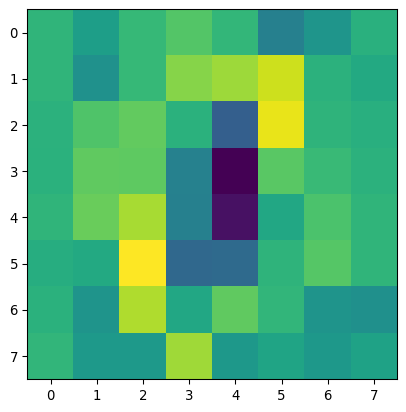

In [34]:
coef = clf.estimators_[0].coef_
plt.imshow(coef[0].reshape(width,height))

## Visualization

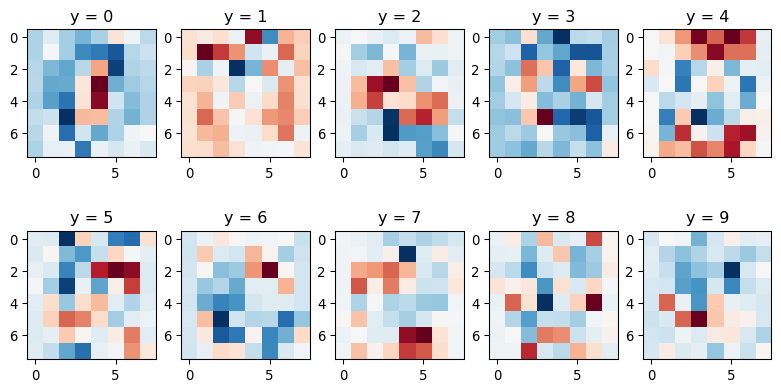

In [35]:
plt.figure(figsize=(10,5))

for index in range(len(clf.classes_)):
    plt.subplot(2, 5, index + 1)
    plt.title(f'y = {clf.classes_[index]}')
    plt.imshow(clf.estimators_[index].coef_.reshape(width,width), 
               cmap=plt.cm.RdBu)

Each `LogisticRegression` learns 64 $\theta_i$ parameters.

In the images above, red pixels correspond to negative coefficients,
while blue pixels correspond to positive coefficients.

For the first classifier, which predicts the digit ‘0’, the model
assigns negative weights to high-intensity pixels in the center of the
image and positive weights to high-intensity pixels in the oval region
surrounding the center.

## Visualization

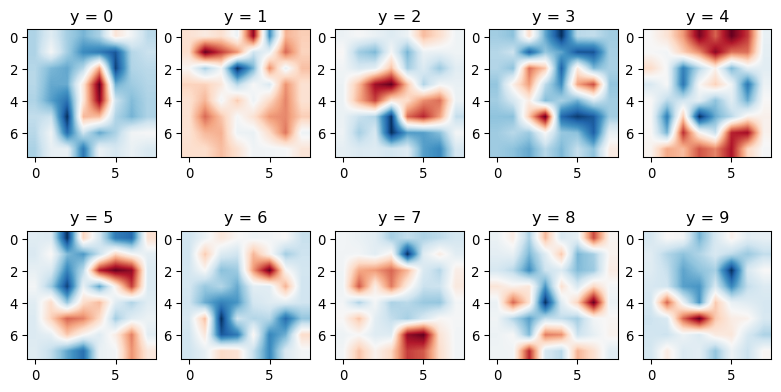

In [36]:
plt.figure(figsize=(10,5))

for index in range(len(clf.classes_)):
    plt.subplot(2, 5, index + 1)
    plt.title(f'y = {clf.classes_[index]}')
    plt.imshow(clf.estimators_[index].coef_.reshape(width,width), 
               cmap=plt.cm.RdBu,
               interpolation='bilinear')

------------------------------------------------------------------------

<https://youtu.be/AX-ZEC-71DI>

**Attribution**: [Machine Learning and Logistic
Regression](https://youtu.be/AX-ZEC-71DI), IBM Technology, 2024-07-19.

# Prologue

## References

Alharbi, Fadi, and Aleksandar Vakanski. 2023.
“<span class="nocase">Machine Learning Methods for Cancer Classification
Using Gene Expression Data: A Review</span>.” *Bioengineering* 10 (2):
173. <https://doi.org/10.3390/bioengineering10020173>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

Wu, Qianfan, Adel Boueiz, Alican Bozkurt, Arya Masoomi, Allan Wang, Dawn
L DeMeo, Scott T Weiss, and Weiliang Qiu. 2018.
“[<span class="nocase">Deep Learning Methods for Predicting Disease
Status Using Genomic
Data</span>](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6530791).”
*Journal of Biometrics & Biostatistics* 9 (5).

## Resources

-   [Logistic Regression 3-class
    Classifier](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
    from `sklearn`

## Next lecture

-   Negative log-likelihood, geometric interpretation, implementation

# One-vs-All

## One-vs-All classifier (complete)

In [37]:
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

## One-vs-All classifier (complete)

In [38]:
# Train a One-vs-All classifier for each class

classifiers = []
for i in range(3):
    clf = LogisticRegression()
    clf.fit(X_train, y_train[:, i])
    classifiers.append(clf)

Each logistic regression finds a **hyperplane** in a **4-dimensional
space** that separates the data into two classes.

## One-vs-All classifier (complete)

In [39]:
# Predict on a new sample
new_sample = X_test[0].reshape(1, -1)
confidences = [clf.decision_function(new_sample) for clf in classifiers]

# Final assignment
final_class = np.argmax(confidences)

# Printing the result
print(f"Final class assigned: {iris.target_names[final_class]}")
print(f"True class: {iris.target_names[np.argmax(y_test[0])]}")

Final class assigned: versicolor
True class: versicolor

## `label_binarized`

In [40]:
from sklearn.preprocessing import label_binarize

# Original class labels
y_train = np.array([0, 1, 2, 0, 1, 2, 1, 0])

# Binarize the labels
y_train_binarized = label_binarize(y_train, classes=[0, 1, 2])

# Assume y_train_binarized contains the binarized labels
print("Binarized labels:\n", y_train_binarized)

# Convert binarized labels back to the original numerical values
original_labels = [np.argmax(b) for b in y_train_binarized]
print("Original labels:\n", original_labels)

Binarized labels:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
Original labels:
 [np.int64(0), np.int64(1), np.int64(2), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(0)]

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa

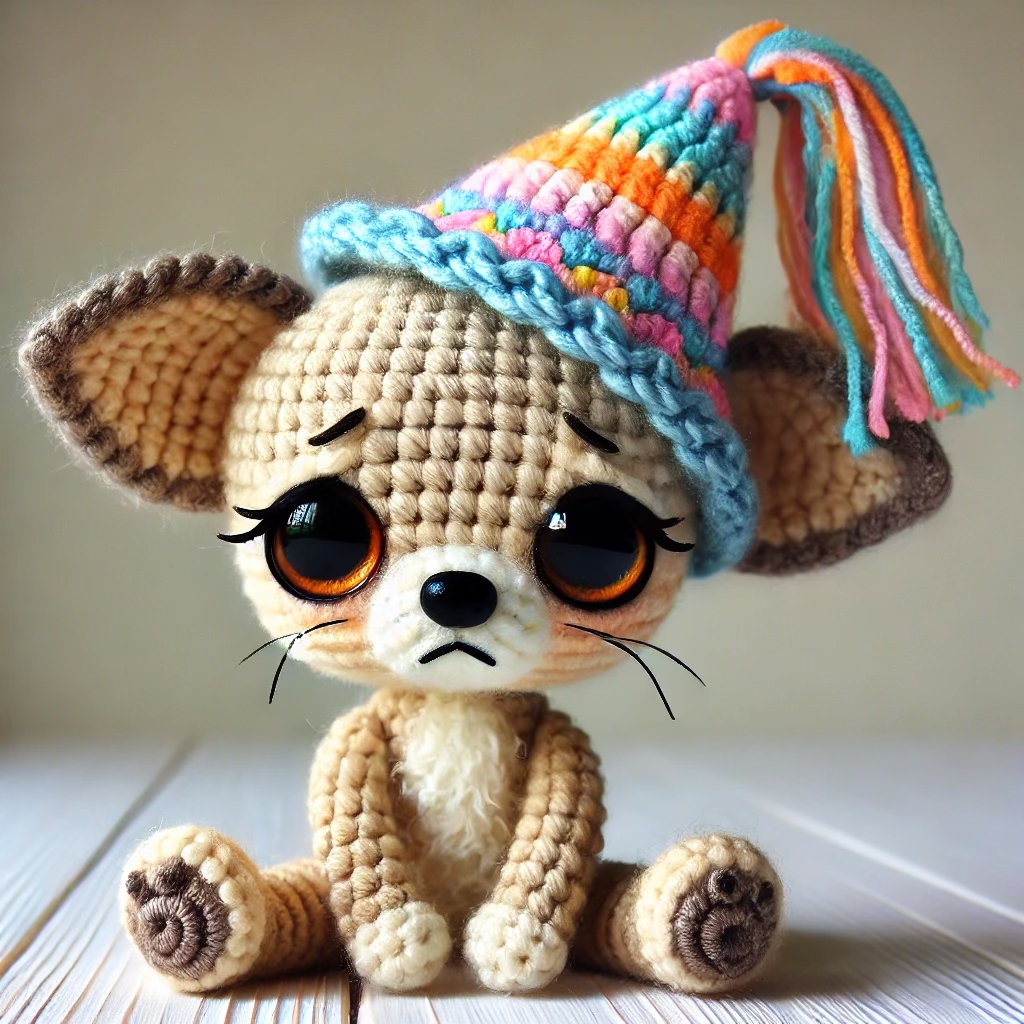

**Attribution**: “An image of a sad Chihuahua amigurumi with a birthday
hat.” Generated by DALL-E, via ChatGPT (GPT-4), OpenAI, September 16,
2024.